In [ ]:
#Installing netket
%pip install --quiet netket

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 695.1/695.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
#Making sure we're running on CPU
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"

In [ ]:
#Defining the Hamiltonian for the XXZ model
import netket as nk
import numpy as np
import scipy.sparse as sp
L = 2
hxxz = nk.hilbert.Spin(s=1 / 2, N=L)

In [ ]:
#Specifying the Hamiltonian
from netket.operator.spin import sigmax,sigmaz,sigmay
from netket.operator.boson import identity
def create_hamiltonian(delta, hxxz):
  H = np.sum([-sigmax(hxxz,i-1)*sigmax(hxxz,i)
         - sigmay(hxxz,i-1)*sigmay(hxxz,i)
         - delta*sigmaz(hxxz,i-1)*sigmaz(hxxz,i) for i in range(1,hxxz.size)])
  if L != 2:
    #Wih L=2, we remove periodic conditions, since it would be duplicating the hamiltonian. The chain has already periodic ocnditions
    H= H-sigmax(hxxz,0)*sigmax(hxxz,hxxz.size-1)-sigmay(hxxz,0)*sigmay(hxxz,hxxz.size-1)- delta*sigmaz(hxxz,0)*sigmaz(hxxz,hxxz.size-1)

  return H
def getSx(hxxz):
        return sum(sigmax(hxxz, i) for i in range(hxxz.size))
def getSy(hxxz):
        return sum(sigmay(hxxz, i) for i in range(hxxz.size))
def getSz(hxxz):
        return sum(sigmaz(hxxz, i) for i in range(hxxz.size))

Here we create a hamiltonian for L=2, $\delta=2$:

In [ ]:
# Exact diagonalization
delta = 2
H = create_hamiltonian(delta,hxxz)
print(H.to_dense())

[[-2.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  2.+0.j -2.+0.j  0.+0.j]
 [ 0.+0.j -2.+0.j  2.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -2.+0.j]]


And check results:

In [ ]:

##We obtain the eigenvectors and eigenvalues of the Hamiltonian with np.linalg
eig_vals, eig_vecs = np.linalg.eig(H.to_dense())

print("eigenvalues with numpy linalg:\n\n", eig_vals)
print("eigenvectors with  numpy linalg:\n\n", eig_vecs)

E_gs = eig_vals[0]

eigenvalues with numpy linalg:

 [ 4.00000000e+00+0.j  2.88815012e-32+0.j -2.00000000e+00+0.j
 -2.00000000e+00+0.j]
eigenvectors with  numpy linalg:

 [[ 0.        +0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [-0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j]]


Since, we are asked to give the expected values of S_i i=x,y,z, we obtain the commutators between H and total spin operators and see that, in general, $S_x$ and $S_y$ don´t commute with $H$, but $S_z$ does commute.

In [ ]:
delta=1
L=2
hxxz = nk.hilbert.Spin(s=1 / 2, N=2)
H=create_hamiltonian(delta,hxxz).to_dense()

##We can check that the Hamiltonian commutes with the total Spin operators when delta=1
Sx = getSx(hxxz).to_dense()
Sy =  getSy(hxxz).to_dense()
Sz = getSy(hxxz).to_dense()
print("With anisotropy = 1, H commutes with S_i:\n\n")

print(np.allclose((H@Sx-Sx@H), np.zeros((2**L,2**L))))
print(np.allclose((H@Sy-Sy@H), np.zeros((2**L,2**L))))
print(np.allclose((H@Sz-Sz@H), np.zeros((2**L,2**L))))

print("\n\n\n")
L=5
hxxz = nk.hilbert.Spin(s=1 / 2, N=5)
H=create_hamiltonian(delta,hxxz).to_dense()
##We can check that the Hamiltonian commutes with the total Spin operators when delta=1 , XXX case.
Sx = getSx(hxxz).to_dense()
Sy =  getSy(hxxz).to_dense()
Sz = getSy(hxxz).to_dense()
print("\n\n With anisotropy = 1 (for all L), H commutes with S_i:\n\n")

print(np.allclose((H@Sx-Sx@H), np.zeros((2**L,2**L))))
print(np.allclose((H@Sy-Sy@H), np.zeros((2**L,2**L))))
print(np.allclose((H@Sz-Sz@H), np.zeros((2**L,2**L))))


##As delta=1 is the only value that gives a null commutator between S_i {i=x,y,z} and H, with rest of values of delta in [-2,2]
##the degenerate eigenstates of the Hamiltonian will have, a-priori, different eigenvalues for the total spin operators.

L=5
hxxz = nk.hilbert.Spin(s=1 / 2, N=5)
H=create_hamiltonian(0.0,hxxz).to_dense()

Sx = getSx(hxxz).to_dense()
Sy =  getSy(hxxz).to_dense()
Sz = getSz(hxxz).to_dense()
print("\n\nWith anisotropy different from 1, H doesn´t commute with S_x, S_y:\n\n")
print(np.allclose((H@Sx-Sx@H), np.zeros((2**L,2**L))))
print(np.allclose((H@Sy-Sy@H), np.zeros((2**L,2**L))))
print(np.allclose((H@Sz-Sz@H), np.zeros((2**L,2**L))))











With anisotropy = 1, H commutes with S_i:


True
True
True






 With anisotropy = 1 (for all L), H commutes with S_i:


True
True
True


With anisotropy different from 1, H doesn´t commute with S_x, S_y:


False
False
True


In [ ]:
##Gets the multipartite state of L qubits and returns the Von Neumann entropy of the bipartite system L/2,L/2 (even) or the subsystem of (L-1)/2 particles (odd)
def get_entropy_bipartite(state,L):
   """
    Get the entropy of the bipartite system given by the half of the qubits of the system represented by state.
    If the number of spins is odd, it will return the entropy of (L-1)/2 qubits.

    Args:
        L (int): Total number of qubits
        state (np.array): State of the system.

    Returns:
        entropy (float): Entropy of the system composed by half the qubits.
    """
  #print(state)
   #print(rho_GS)

  ##Reshape the density matrix to perform the partial trace over half the qubits.
   rho=np.outer(state, state.conj())
   shape=[2]*(2*L)
   #Init traced_rho variable
   traced_rho=rho.reshape(shape)
   j=0
   for i in range((L+1)//2):
    #Trace the density matrix
    traced_rho= np.trace(traced_rho, axis1=0, axis2= L-i)
    j+=1
   re_reshaped=traced_rho.reshape(2**(L-j),2**(L-j))

  #print(re_reshaped.shape)
  #print(re_reshaped)

   prob, eigv= np.linalg.eig(1/2*(re_reshaped+re_reshaped.conj()))
   prob = prob[prob > 0]
   return -np.sum(np.abs(prob)*np.log2(np.abs(prob)))

##Check the entropy function against Bell States
bell_state_0=1/np.sqrt(2)*np.array([1,0,0,1])

bell_state_1=1/np.sqrt(2)*np.array([1,0,0,-1])

bell_state_2=1/np.sqrt(2)*np.array([0,1,1,0])

bell_state_3=1/np.sqrt(2)*np.array([0,1,-1,0])

L=2
print(get_entropy_bipartite(bell_state_0,L))
print(get_entropy_bipartite(bell_state_1,L))
print(get_entropy_bipartite(bell_state_2,L))
print(get_entropy_bipartite(bell_state_3,L))

<class 'numpy.ndarray'>
1.0
<class 'numpy.ndarray'>
1.0
<class 'numpy.ndarray'>
1.0
<class 'numpy.ndarray'>
1.0


In [ ]:
def obtain_Si(hxxz):
  '''
  This method obtains the total spin operators for a given Hilbert space
  Parameters:
    hxxz: The Hilbert space
  Returns:
    [Sx,Sy,Sz]: The total spin operators
  '''
  Sx=getSx(hxxz)
  Sy=getSy(hxxz)
  Sz=getSz(hxxz)

  return [Sx,Sy,Sz]

def compute_Si(state):
  """
  This method returns the expectation values for the total spin operators and the variance.
  Parameters:
    state: The wave function of the system
  Returns:
    [[Sx_exp, Sy_exp, Sz_exp], [Sx2_exp- np.abs(Sx_exp)**2, Sy2_exp-np.abs(Sy_exp)**2, Sz2_exp-np.abs(Sz_exp)**2]]
  """
  SxG =  Sx @ state.T
  SyG = Sy @ state.T
  SzG = Sz @ state.T
  Sx_exp = state.conj() @ SxG
  Sy_exp = state.conj() @ SyG
  Sz_exp = state.conj() @ SzG
  Sx2_exp = state.conj() @ (Sx@SxG)
  Sy2_exp = state.conj() @ (Sy@SyG)
  Sz2_exp = state.conj() @ (Sz@SzG)
  return [[Sx_exp, Sy_exp, Sz_exp], [Sx2_exp- np.abs(Sx_exp)**2, Sy2_exp-np.abs(Sy_exp)**2, Sz2_exp-np.abs(Sz_exp)**2]]


def compute_values_gs(hxxz, delta):
    """
    Compute the ground state energy, the degeneracy and all the ground states of a 1D chain of N spin-1/2 particles with a Hamiltonian
    parameterized by delta.

    Parameters:
      N     : Number of sites (the Hilbert space will have dimension 2**N).
      delta : Parameter for the Hamiltonian.

    Returns:
      E_gs                 : Ground state energy.
      deg                  : Degeneracy of the ground state.
      ground_states        : List of all the ground states.

    """
    # Build the Hilbert space

    # Build the Hamiltonian
    H = create_hamiltonian(delta,hxxz)

    #Obtain eigenvectors and eigenvalues
    eig_vals, eig_vecs = np.linalg.eig(H.to_dense())

    #Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eig_vals)
    eig_vals_sorted = eig_vals[sorted_indices]
    eig_vecs_sorted = eig_vecs[:, sorted_indices]


    #Select the ground state energy
    E_gs=eig_vals_sorted[0]
    gap=1e-1

    ground_states=[]
    deg=0
    for i in range(eig_vals_sorted.size):
      if i==0:
          deg+=1
          ground_states.append(eig_vecs_sorted[:,0])
      elif i > 0 and eig_vals_sorted[i]-eig_vals_sorted[i-1]<gap:
          #Degenerate case.
          deg+=1
          ground_states.append(eig_vecs_sorted[:,i])
      elif i > 0 :
          break;

    ##Return degeneracy, ground_states and energy of the ground state
    return E_gs, deg, ground_states

In [ ]:
hxxz = nk.hilbert.Spin(s=1/2, N=5)

Sx,Sy,Sz=obtain_Si(hxxz)
state=compute_values_gs(hxxz,1)[2][0]
spin_Data=compute_Si(state)
print(np.abs(spin_Data[1][2]))


0.0


We see here how the $L=5$ case in $XXX$ model ($\Delta=1$) gives five degrees of degeneracy in the ground state. As it behaves as a ferromagnet, the ground state shows non null magnetization, as can be observed in the expectation values of $S_z$. As in this case the hamiltonian commutes with both $S^2$ and $S_z$, a common base can be found, with well-defined $S^2$ and $S_z$


In [ ]:
L = 5
delta = 1.0
hxxz = nk.hilbert.Spin(s=1/2, N=L)
H=create_hamiltonian(0.0,hxxz).to_dense()
Sx,Sy,Sz=obtain_Si(hxxz)
results = compute_values_gs(hxxz, delta)
states=results[2]
print(f"Ground state energy: {results[0].real}")
for i,state in enumerate(states):
    print(f"State: {i}")
    spin_data = compute_Si(state)
    print(f"  Sx: {np.abs(spin_data[0][0])}")
    print(f"  Sy: {np.abs(spin_data[0][1])}")
    print(f"  Sz: {np.abs(spin_data[0][2])}")
    print(f"  Var Sx: {np.abs(spin_data[0][0])}")
    print(f"  Var Sy: {np.abs(spin_data[0][1])}")
    print(f"  Var Sz: {np.abs(spin_data[0][2])}")

    print(f"  Entropy: {get_entropy_bipartite(state,L)}")
    print("\n\n")





Ground state energy: -5.000000000000006
State: 0
  Sx: 0.08487236391841511
  Sy: 5.204170427930421e-18
  Sz: 0.9995986131094317
  Var Sx: 0.08487236391841511
  Var Sy: 5.204170427930421e-18
  Var Sz: 0.9995986131094317
<class 'numpy.ndarray'>
  Entropy: 1.2952188937780482



State: 1
  Sx: 2.9778725225157045e-17
  Sy: 6.162975822039155e-33
  Sz: 2.9993585985113964
  Var Sx: 2.9778725225157045e-17
  Var Sy: 6.162975822039155e-33
  Var Sz: 2.9993585985113964
<class 'numpy.ndarray'>
  Entropy: 0.9718892255688786



State: 2
  Sx: 0.0
  Sy: 0.0
  Sz: 5.0
  Var Sx: 0.0
  Var Sy: 0.0
  Var Sz: 5.0
<class 'numpy.ndarray'>
  Entropy: -0.0



State: 3
  Sx: 0.0
  Sy: 0.0
  Sz: 3.0
  Var Sx: 0.0
  Var Sy: 0.0
  Var Sz: 3.0
<class 'numpy.ndarray'>
  Entropy: 0.9709505944546688



State: 4
  Sx: 0.0
  Sy: 0.0
  Sz: 5.0
  Var Sx: 0.0
  Var Sy: 0.0
  Var Sz: 5.0
<class 'numpy.ndarray'>
  Entropy: -0.0



State: 5
  Sx: 0.21162129765813414
  Sy: 6.938893903907228e-18
  Sz: 1.0028028754856337
  Var Sx

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


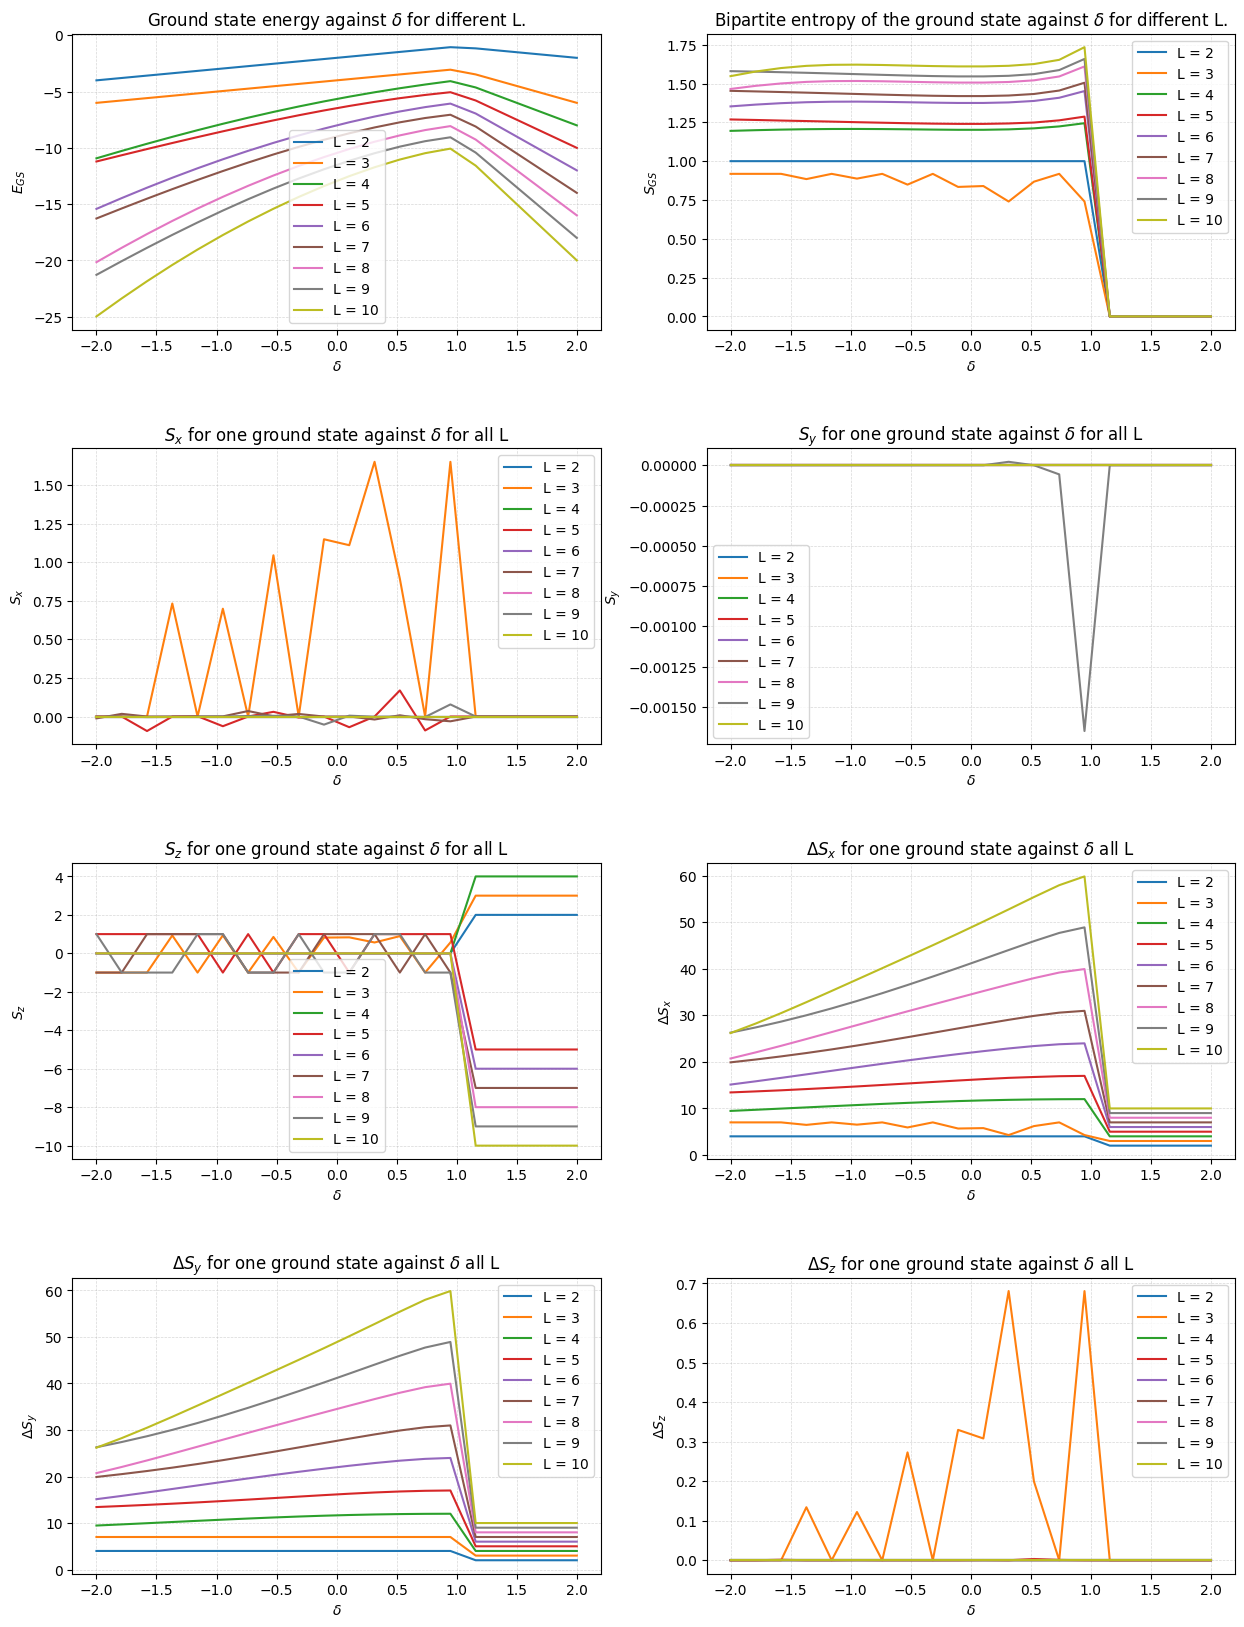

In [ ]:
import matplotlib.pyplot as plt

# Set up the system sizes and delta values.
L_values = range(2, 11)  # System sizes L = 2 to 10
delta_values = np.linspace(-2, 2, 20)  # Delta parameter values.
deg_deltas={}

# Compute and store results.

results={}
# Plot the ground state energy as a function of delta for each L.
#plt.figure(figsize=(10, 6))
fig, axes = plt.subplots(4, 2, figsize=(15,20))
plt.subplots_adjust(hspace=0.4)
degeneracies={}
for L in L_values:
    hxxz = nk.hilbert.Spin(s=1/2, N=L)

    results[L]=[]
    energies=[]
    entropies=[]
    Sx,Sy,Sz= obtain_Si(hxxz)
    Sx_exp=[]
    Sy_exp=[]
    Sz_exp=[]
    VarSx=[]
    VarSy=[]
    VarSz=[]
    degeneracies[L]=[]
    for delta in delta_values:
      result= compute_values_gs(hxxz, delta)
      results[L].append( compute_values_gs(hxxz, delta) )
      energies.append(result[0])

      #We obtain data for the first ground state
      first_ground_state=result[2][0]
      entropies.append(get_entropy_bipartite(first_ground_state,L))
      spin_data= compute_Si(first_ground_state)
      Sx_exp.append(spin_data[0][0])
      Sy_exp.append(spin_data[0][1])
      Sz_exp.append(spin_data[0][2])

      VarSx.append(spin_data[1][0])
      VarSy.append(spin_data[1][1])
      VarSz.append(spin_data[1][2])

      degeneracies[L].append(result[1])



    #Entropy of the first ground state







    axes[0][0].plot(delta_values, energies, label=f"L = {L}")
    axes[0][1].plot(delta_values, entropies, label=f"L = {L}")

    axes[1][0].plot(delta_values, Sx_exp, label=f"L = {L}")

# Si tienen degeneración 2, hallare Sx_exp_0 y Sx_exp1, Sy_exp_0... y los plotearé
    axes[1][1].plot(delta_values, Sy_exp, label=f"L = {L}")
    axes[2][0].plot(delta_values, Sz_exp, label=f"L = {L}")
    axes[2][1].plot(delta_values, VarSx, label=f"L = {L}")
    axes[3][0].plot(delta_values, VarSy, label=f"L = {L}")
    axes[3][1].plot(delta_values, VarSz, label=f"L = {L}")



axes[0][0].set_xlabel(r"$\delta$")
axes[0][0].set_ylabel(r"$E_{GS}$")
axes[0][0].set_title(rf"Ground state energy against $\delta$ for different L.")
axes[0][0].legend()
axes[0][0].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

axes[0][1].set_xlabel(r"$\delta$")
axes[0][1].set_ylabel(r"$S_{GS}$")
axes[0][1].set_title(rf"Bipartite entropy of the ground state against $\delta$ for different L.")
axes[0][1].legend()
axes[0][1].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)



axes[1][0].set_xlabel(r"$\delta$")
axes[1][0].set_ylabel("$S_x$")
axes[1][0].set_title(rf"$S_x$ for one ground state against $\delta$ for all L")
axes[1][0].legend()
axes[1][0].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)


axes[1][1].set_xlabel(r"$\delta$")
axes[1][1].set_ylabel("$S_y$")
axes[1][1].set_title(rf"$S_y$ for one ground state against $\delta$ for all L")
axes[1][1].legend()
axes[1][1].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

axes[2][0].set_xlabel(r"$\delta$")
axes[2][0].set_ylabel("$S_z$")
axes[2][0].set_title(rf"$S_z$ for one ground state against $\delta$ for all L")
axes[2][0].legend()
axes[2][0].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

axes[2][1].set_xlabel(r"$\delta$")
axes[2][1].set_ylabel("$\Delta S_x$")
axes[2][1].set_title(rf"$\Delta S_x$ for one ground state against $\delta$ all L")
axes[2][1].legend()
axes[2][1].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

axes[3][0].set_xlabel(r"$\delta$")
axes[3][0].set_ylabel("$\Delta S_y$")
axes[3][0].set_title(rf"$\Delta S_y$ for one ground state against $\delta$ all L")
axes[3][0].legend()
axes[3][0].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

axes[3][1].set_xlabel(r"$\delta$")
axes[3][1].set_ylabel("$\Delta S_z$")
axes[3][1].set_title(rf"$\Delta S_z$ for one ground state against $\delta$ all L")
axes[3][1].legend()
axes[3][1].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)


plt.show()


Whereas the degeneracy is 2 for all odd $L$, it breaks from 1 to 2 in  $\delta$ greater than for all the ground states for even$L$. For $\delta=1$ the degeneracy is that of the $S^2$ operator, as H commutes with $S^2$. In this case, the ground states belong to the multiplets and have aligned spins, leading to non null magnetization. As the hamiltonian commutes with $Sz$, it exists a common base of eigenvectors. That´s why our diagonalization algorithm finds solutions with well defined $S_z$ (null variance).

We think that the case of L=3 with non null variance in $S_z$ is due to numerical errors.

The $S_z$ values obtained for the ground state of different values of $L$ in $\Delta$ lower than 1 are 0 for even values of $L$ and non null for odd values. That´s because the chain in such values of $\Delta$ behaves as a paramagnet and all the spins are unaligned. In L odd, two spins must be aligned, that´s why we see 1 or -1. Take into account that we only represent one ground state and it seems to be switching from +1 to -1, but it isn´t happenning. What happens is that the diagonalization algorithm only finds one of the ground states, and there are two. Sometimes it finds +1 or -1.


In the case of the entropy, it´s much bigger in the paramagnet phase, since in the $\Delta \geq 1$ it behaves as a ferromagnet, when the state is not entangled at all, since all the spins are aligned.

Due to the fact that Sx and Sy don´t commute with H for all $\Delta \neq 1$, those magnitudes are not well defined for the eigenstates of the hamiltonian, so the variance has fluctuations and the Sx Sy expectation values don´t give multiples of the spin.

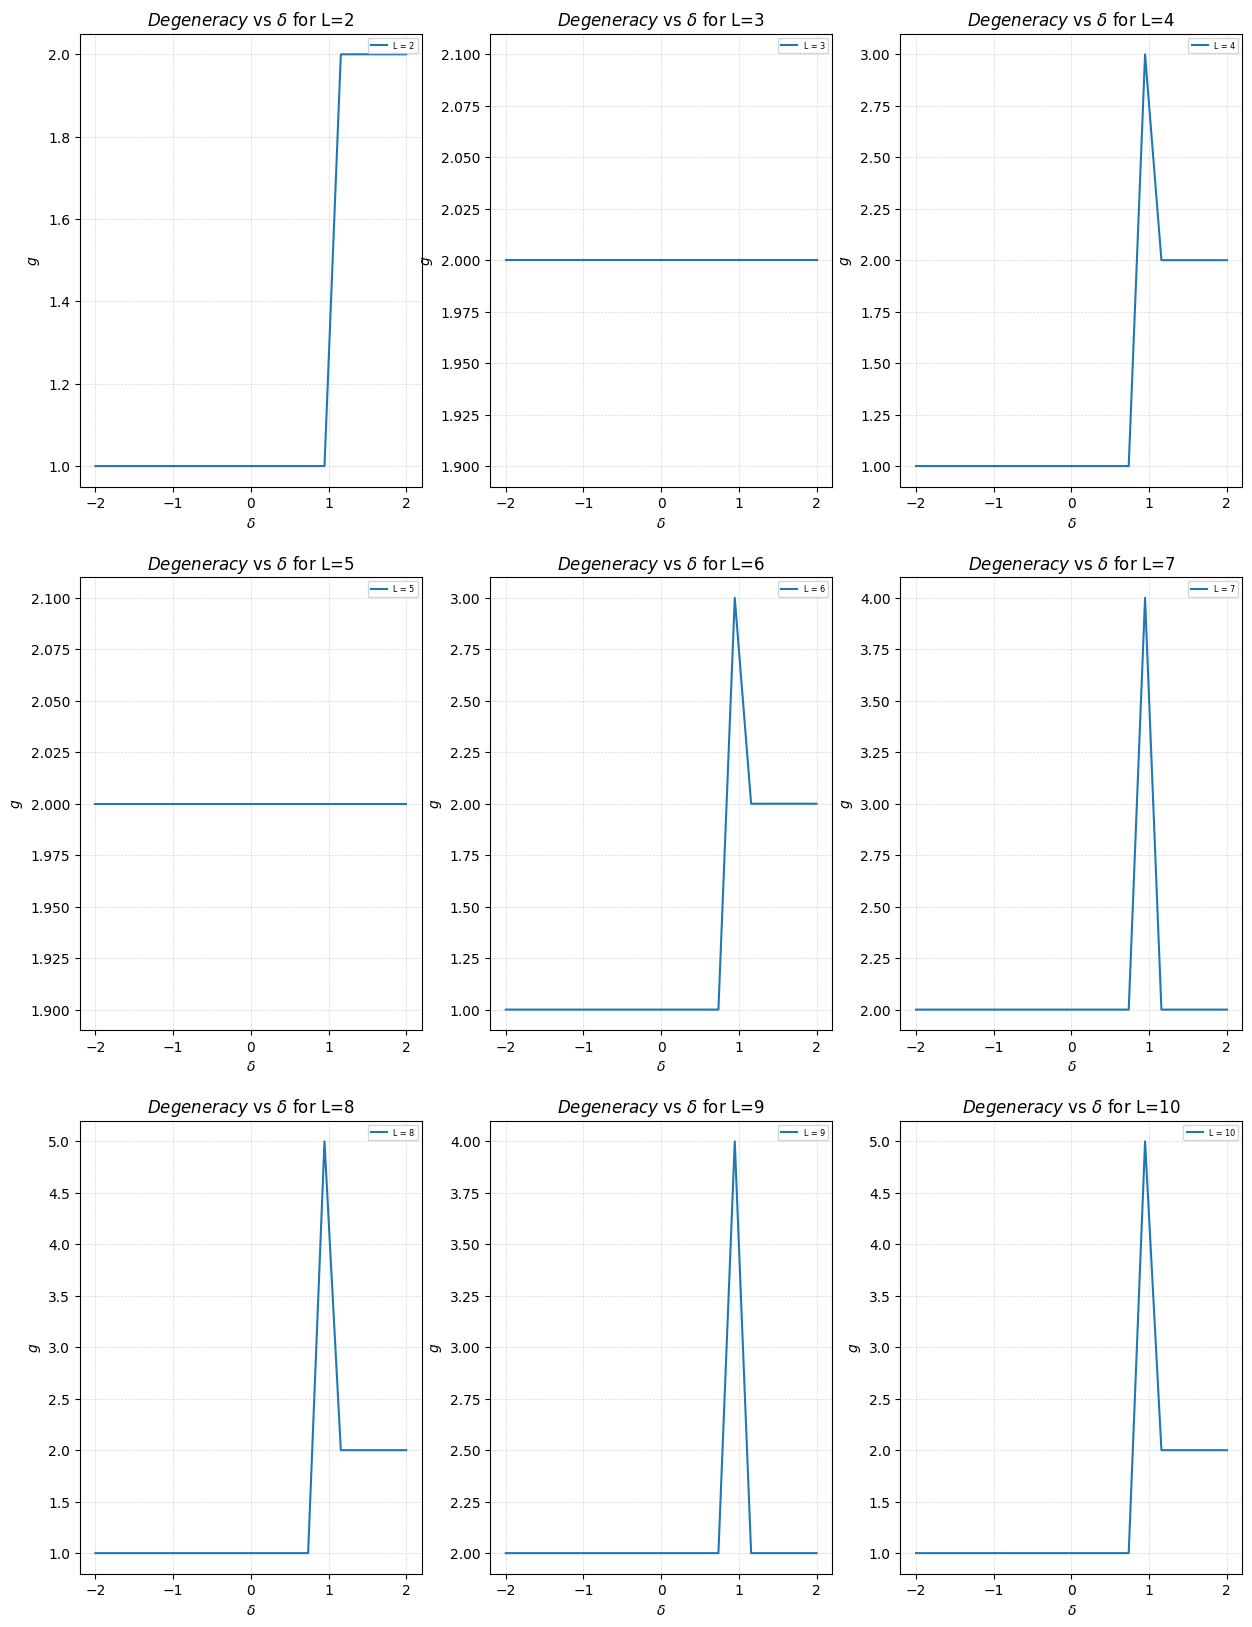

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))
for k in range(3):
    for j in range(3):
      L=  np.ravel_multi_index((k, j), (3,3))+2

      axes[k][j].plot(delta_values, degeneracies[L], label=f"L = {L}")
      axes[k][j].set_xlabel(r"$\delta$")
      axes[k][j].set_ylabel(r"$g$")
      axes[k][j].set_title(rf"$Degeneracy$ vs $\delta$ for L={L}")
      axes[k][j].grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
      axes[k][j].legend(fontsize='xx-small')


plt.show()

We can see in this plots that for $\Delta=1$ the ground states has the degeneracy of a multiplet of spin. States in which the spins are aligned belong to the ground state subspace.

Once we have obtained information about the ED, we will try to find an ansatz to obtain the ground states with the VQE algorithm.

Here we will define the quantum gates we will apply in order to build the ansatzs. Below we define the gates $R_x(\theta)$, $R_y(\theta)$, $R_z(\theta)$, applied to the qubit i, and the CNOT, applied between qubits i and j. With $CNOT$, $R_{xx}(\theta)$, $R_{yy}(\theta)$ and $R_{zz}(\theta)$ gates we define the entanglement between qubits. At nearest neighbours, we can create the ansatz hardware_efficient_ansatz

In [ ]:
import torch as pt
from torch import matrix_exp as expm
import scipy.sparse as sp

def Rx(theta, j, hxxz):
#    sigma_x=sigmax(hxxz,j)
#    sigma_x_sparse=sp.csr_matrix(sigma_x.to_dense())
    sigma_x=pt.tensor(sigmax(hxxz,j).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor

#    return sp.linalg.expm(-1j*theta/2*sigma_x_sparse)
    return expm(-1j*theta/2*sigma_x) #Use torch.matrix_exp

def Rxx(theta,i, j, hxxz):
#    sigma_x=sigmax(hxxz,j)
#    sigma_x_sparse=sp.csr_matrix(sigma_x.to_dense())
    sigma_x_i=pt.tensor(sigmax(hxxz,i).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor
    sigma_x_j=pt.tensor(sigmax(hxxz,j).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor

#    return sp.linalg.expm(-1j*theta/2*sigma_x_sparse)
    return expm(-1j*theta/2*sigma_x_i@sigma_x_j) #Use torch.matrix_exp


def Ryy(theta,i, j, hxxz):
#    sigma_y=sigmax(hxxz,j)
#    sigma_y_sparse=sp.csr_matrix(sigma_x.to_dense())
    sigma_y_i=pt.tensor(sigmay(hxxz,i).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor
    sigma_y_j=pt.tensor(sigmay(hxxz,j).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor

#    return sp.linalg.expm(-1j*theta/2*sigma_x_sparse)
    return expm(-1j*theta/2*sigma_y_i@sigma_y_j) #Use torch.matrix_exp

def Rzz(theta,i, j, hxxz):
#    sigma_z=sigmax(hxxz,j)
#    sigma_z_sparse=sp.csr_matrix(sigma_x.to_dense())
    sigma_z_i=pt.tensor(sigmay(hxxz,i).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor
    sigma_z_j=pt.tensor(sigmay(hxxz,j).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor

#    return sp.linalg.expm(-1j*theta/2*sigma_x_sparse)
    return expm(-1j*theta/2*sigma_z_i@sigma_z_j) #Use torch.matrix_exp

def Ry(theta, j, hxxz):
    #sigma_y=sigmax(hxxz,j)
    #sigma_y_sparse=sp.csr_matrix(sigma_y.to_dense())
    #return sp.linalg.expm(-1j*theta/2*sigma_y_sparse)
    sigma_y=pt.tensor(sigmay(hxxz,j).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor and use correct Pauli matrix for y-axis rotation
    return expm(-1j*theta/2*sigma_y) #Use torch.matrix_exp

def Rz(theta, j,hxxz):
    #sigma_y=sigmay(hxxz,j)
    #sigma_y_sparse=sp.csr_matrix(sigma_y.to_dense())
    #return sp.linalg.expm(-1j*theta/2*sigma_y_sparse)
    sigma_z=pt.tensor(sigmaz(hxxz,j).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor and use correct Pauli matrix for z-axis rotation
    return expm(-1j*theta/2*sigma_z) #Use torch.matrix_exp

def CNOT(i,j, hxxz):
#    sigma_z=sigmaz(hxxz,j)
#    sigma_x=sigmax(hxxz,j)
#    sigma_z_sparse=sp.csr_matrix(sigma_z.to_dense())
#    sigma_x_sparse=sp.csr_matrix(sigma_x.to_dense())

#    identity_sparse = sp.csr_matrix(identity.to_dense())
#    return sp.linalg.expm(np.pi / 4 * (identity_sparse - sigma_z_sparse) @ (identity_sparse - 1j * sigma_x_sparse))
    sigma_z=pt.tensor(sigmaz(hxxz,i).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor
    sigma_x=pt.tensor(sigmax(hxxz,j).to_dense(),dtype=pt.complex128) #Convert to PyTorch tensor
    identity_matrix = pt.eye(sigma_z.shape[0],dtype=pt.complex128) #Create identity matrix using PyTorch

    return expm(1j*np.pi / 4 * (identity_matrix - sigma_z) @ (identity_matrix - sigma_x)) #Use torch.matrix_exp





def nearest_neighbours_ansatz(theta,hxxz):
  '''
  Nearest_neighbours ansatz. It consists in Ry,Rz gates applied to each qubit and CNOT applied to nearest neighbours. Each quantum gate Rz and Ry
  depends on an independent parameter theta[i]. CNOT gates don´t depend on parameters.
  Parameters:
     theta:  is a vector of size 2*hxxz.size
     hxxz: the Hilbert space (netket)

  returns psi_tmp, the wave function of the state after applying the circuit
  '''
  L=hxxz.size
  D= 2**L
  #psi_re = np.zeros(D)
  #psi_im = np.zeros(D)
  psi_re = pt.zeros(D,dtype=pt.float64)
  psi_im = pt.zeros(D,dtype=pt.float64)

  psi_re[D-1] = 1   # In computational basis this vector
                    # corresponds to all spins down

  #psi_tmp = psi_re+1j*psi_im
  #psi_tmp= sp.csr_matrix(psi_tmp.reshape(-1,1))  #Convert to sparse column vector
  psi_tmp=pt.complex(psi_re,psi_im)
  for i in range(L):
        psi_tmp = Ry(theta[i],i,hxxz)@psi_tmp
        psi_tmp = Rz(theta[i+L],i,hxxz)@psi_tmp
        if i != L-1 :
         ##We apply CNOT between nearest neighbours
         psi_tmp = CNOT(i,i+1,hxxz)@psi_tmp
        else:
          psi_tmp = CNOT(0,L-1,hxxz)@psi_tmp





  return psi_tmp


def nearest_neighbours_ansatz_eff(theta,hxxz):
  '''
  This ansatz has the same number of quantum gates as the nearest_neighbours. However,
  it need only half the parameters.
  Parameters:
     theta:  is a vector of size hxxz.size
     hxxz: the Hilbert space (netket)

  returns psi_tmp, the wave function of the state after applying the circuit

  '''
  L=hxxz.size
  D= 2**L
  #psi_re = np.zeros(D)
  #psi_im = np.zeros(D)
  psi_re = pt.zeros(D,dtype=pt.float64)
  psi_im = pt.zeros(D,dtype=pt.float64)

  psi_re[D-1] = 1   # In computational basis this vector
                    # corresponds to all spins down

  #psi_tmp = psi_re+1j*psi_im
  #psi_tmp= sp.csr_matrix(psi_tmp.reshape(-1,1))  #Convert to sparse column vector
  psi_tmp=pt.complex(psi_re,psi_im)
  for i in range(L):
        psi_tmp = Ry(theta[i],i,hxxz)@psi_tmp
        psi_tmp = Rz(theta[i],i,hxxz)@psi_tmp
        if i != L-1 :
         ##We apply CNOT between nearest neighbours
         psi_tmp = CNOT(i,i+1,hxxz)@psi_tmp
        else:
          psi_tmp = CNOT(0,L-1,hxxz)@psi_tmp



  return psi_tmp


def get_E(theta, delta,hxxz,ansatz_circuit):
    '''
    Compute the expected energy for the result of the given ansatz circuit.
    Parameters:
       theta: An array of parameters to optimize in order to find the ground state energy
       ansatz_circuit: The function that computes the ansatz circuit
    Returns:
       E: The expected energy
    '''
    psi_tmp = ansatz_circuit(theta, hxxz)
    #H = sp.csr_matrix(create_hamiltonian(delta, hxxz).to_dense())
    H= pt.tensor(create_hamiltonian(delta,hxxz).to_dense(), dtype=pt.complex128)
    E = psi_tmp.conj().T@ H@psi_tmp
    return [E.real,psi_tmp]



Test nearest_neighbours_ansatz with theta=0 as init parameters. It must be a unitary.

In [ ]:
L=2
hxxz = nk.hilbert.Spin(s=1 / 2, N=L)
init_op = nk.operator.boson.identity(hxxz).to_dense()
theta = pt.zeros(2*L)
for i in range(L):
        init_op = Ry(theta[i],i,hxxz)@init_op
        init_op = Rz(theta[i+L],i,hxxz)@init_op
        if i != L-1 :
         ##We apply CNOT between nearest neighbours
         init_op = CNOT(i,i+1,hxxz)@init_op

init_op.T.conj() @init_op




tensor([[1.0000e+00+0.j, 0.0000e+00+0.j, 0.0000e+00+0.j, 0.0000e+00+0.j],
        [0.0000e+00+0.j, 1.0000e+00+0.j, 0.0000e+00+0.j, 0.0000e+00+0.j],
        [0.0000e+00+0.j, 0.0000e+00+0.j, 1.0000e+00+0.j, 6.6613e-16+0.j],
        [0.0000e+00+0.j, 0.0000e+00+0.j, 6.6613e-16+0.j, 1.0000e+00+0.j]],
       dtype=torch.complex128)

Now, we will compute the ground state energy with the hardware_efficient_ansatz for a fixed L. We will use Adam optimization algorithm and backward automatic differentiation with random initialization of the $\theta$ parameters. We can see that, if we set a small enough convergence parameter, the algorithm is more likely to converge to the exact energy. Setting a small convergence paramete favors avoiding local minima and makes it easier to find the global minimum.

In [ ]:
!pip install tqdm
from tqdm import tqdm
import time


In [ ]:
import matplotlib.pyplot as plt
def study_ansatz_fixed_delta(hxxz,delta,ansatz_circuit,n_params,convergence, max_iter):
  '''
  Study the algoritm just in one value of delta and value of L given an ansatz with n_params, a convergence
  parameter and a max number of iterations for the VQE
  Paramemeters:
      hxxz: Netket hilbert space
      delta: Anisotropy parameters
      ansatz_circuit : function that defines the ansatz
      n_params: Number of optimization parameters for the ansatz
      convergence: Convergence parameter
      max_iter: Maximum number of iterations for the VQE

      It prints the exeuction time and the comparison between ED and VQE and plots the evolution of the energy agains training steps.
  '''
  #theta = pt.zeros(n_params,requires_grad=True)
# Create a tensor with requires_grad=True first

  pt.manual_seed(42)  # Set the seed for PyTorch's RNG
  theta = pt.empty(n_params, requires_grad=True)

  # Then fill it with random values using uniform_()
  pt.nn.init.uniform_(theta, -1, 1)



  # Then fill it with random values using uniform_()
 # pt.nn.init.uniform_(theta, -1, 1)
  optimizer = pt.optim.Adam([theta],lr = 0.1)
  E_variational_vs_epochs = []
  print("The initial theta parameters:")
  print(theta)
  print("\n\n")
  prev_e=0.0+0j
  cur_e=1.0+0j
  loss = get_E(theta,delta,hxxz,ansatz_circuit)[0]
  start_time=time.time()
  iterations = 0
  while np.abs(prev_e - cur_e) > convergence and iterations < max_iter:
    prev_e = loss.item()  # Store previous energy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    cur_e = get_E(theta, delta, hxxz, ansatz_circuit)[0].item().real  # Calculate current energy
    E_variational_vs_epochs.append(cur_e)

    loss = get_E(theta, delta, hxxz, ansatz_circuit)[0]  # Update loss for next iteration

    iterations += 1

  end_time=time.time()


  vqe_time=end_time-start_time

  start_time=time.time()

  results = compute_values_gs(hxxz, delta)
  exact_time=time.time()-start_time
  print("Exact diagonalization provides E_GS = " + "{:2.2f}".format(results[0].real))
  print("VQE                   provides E_GS = " + "{:2.2f}".format(E_variational_vs_epochs[-1]))
  print(f"Number of iterations: {iterations}")
  print(f"VQE time: {vqe_time} seconds")
  print(f"Exact diagonalization time: {exact_time} seconds")
  plt.plot(E_variational_vs_epochs)
  plt.axhline(y = results[0].real, color = 'r', linestyle = '--')
  plt.xlabel("Epochs")
  plt.ylabel("Energy")
  print("The final theta parameters:")
  print(theta)

The initial theta parameters:
tensor([ 0.7645,  0.8300, -0.2343,  0.9186, -0.2191,  0.2018, -0.4869,  0.5873,
         0.8815, -0.7336], requires_grad=True)





<ipython-input-16-a97b0a0a1058>:162: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  E = psi_tmp.conj().T@ H@psi_tmp


Exact diagonalization provides E_GS = -7.71
VQE                   provides E_GS = -5.06
Number of iterations: 32
VQE time: 7.259432315826416 seconds
Exact diagonalization time: 0.018263816833496094 seconds
The final theta parameters:
tensor([ 3.1335,  0.0549,  0.2275,  1.2896,  0.2167, -0.1460, -0.1390,  0.5873,
         3.4528,  0.2001], requires_grad=True)


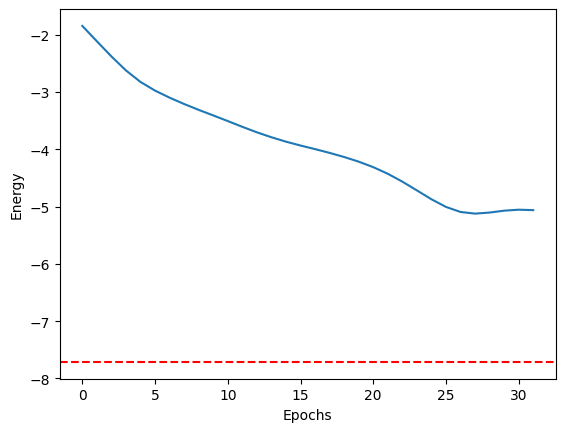

In [ ]:
hxxz= nk.hilbert.Spin(s=1/2, N=5)
study_ansatz_fixed_delta(hxxz,-1,nearest_neighbours_ansatz,10,1e-2,200)


Now, we run the VQE with a different ansatz. This time, we have the same circuit but with half the parameters, nearest_neighbours_ansatz_eff, that seems to be more efficient in terms of complexity. However, it takes a bit longer to reach the minimum. Besides that, it gets a slightly worse approximation to the energy for $\delta=1$

The initial theta parameters:
tensor([ 0.7645,  0.8300, -0.2343,  0.9186, -0.2191], requires_grad=True)



Exact diagonalization provides E_GS = -7.71
VQE                   provides E_GS = -4.82
Number of iterations: 31
VQE time: 6.291306495666504 seconds
Exact diagonalization time: 0.02084660530090332 seconds
The final theta parameters:
tensor([ 3.3665, -0.0638,  0.0172, -0.6973, -0.2042], requires_grad=True)


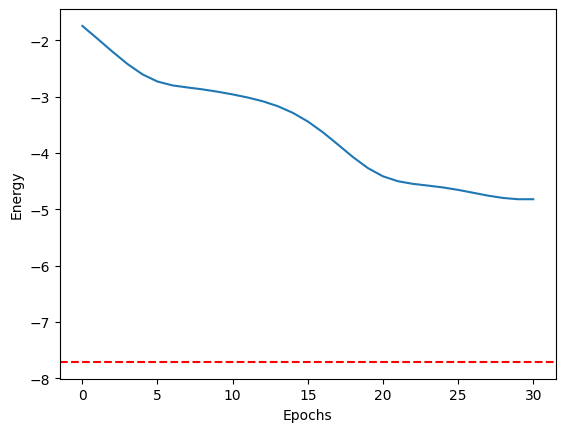

In [ ]:
hxxz= nk.hilbert.Spin(s=1/2, N=5)
study_ansatz_fixed_delta(hxxz,-1,nearest_neighbours_ansatz_eff,5,1e-2,200)


We define another ansatz. This time, we inspire the circuit in the first one, nearest_neighbours_ansatz, but we use two layers of quantum gates, that means having the double of parameters.

In [ ]:
def nearest_neighbours_ansatz_Rii(theta,hxxz):
  '''
  This ansatz has the same number of quantum gates as the nearest_neighbours. However,
  it need only half the parameters.
  Parameters:
     theta:  is a vector of size hxxz.size
     hxxz: the Hilbert space (netket)

  returns psi_tmp, the wave function of the state after applying the circuit

  '''
  L=hxxz.size
  D= 2**L
  #psi_re = np.zeros(D)
  #psi_im = np.zeros(D)
  psi_re = pt.zeros(D,dtype=pt.float64)
  psi_im = pt.zeros(D,dtype=pt.float64)

  psi_re[D-1] = 1   # In computational basis this vector
                    # corresponds to all spins down

  #psi_tmp = psi_re+1j*psi_im
  #psi_tmp= sp.csr_matrix(psi_tmp.reshape(-1,1))  #Convert to sparse column vector
  psi_tmp=pt.complex(psi_re,psi_im)
  for i in range(L):
        if i != L-1 :
          psi_tmp = Rzz(theta[i],i,i+1,hxxz)@psi_tmp
          psi_tmp = Rxx(theta[i+L-1],i,i+1,hxxz)@psi_tmp
        else:
          psi_tmp = Rzz(theta[i+1],0,L-1,hxxz)@psi_tmp
          psi_tmp = Rxx(theta[i+L],0,L-1,hxxz)@psi_tmp

        psi_tmp = Rz(theta[i+2*L+1],i,hxxz)@psi_tmp
        psi_tmp = Rx(theta[i+3*L+1],i,hxxz)@psi_tmp

  #for i in range(L):
      #if i != L-1 :
      #  psi_tmp = CNOT(i,i+1,hxxz)@psi_tmp

         ##We apply CNOT between nearest neighbours
      #  psi_tmp = CNOT(i,i+1,hxxz)@psi_tmp

  #for i in range(L):
  #    if i != L-1 :
  #      psi_tmp = Rzz(theta[i+2*L-2],i,i+1,hxxz)@psi_tmp


  return psi_tmp

As we can see running the code below, we obtain worse results comparing to those obtained with the analogous with just one layer. Besides that, the computational cost of this ansatz is quite higher. It seems that the ansatz is too complex

The initial theta parameters:
tensor([ 0.7645,  0.8300, -0.2343,  0.9186, -0.2191,  0.2018, -0.4869,  0.5873,
         0.8815, -0.7336,  0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,
         0.7709,  0.1478, -0.4668,  0.2549, -0.4607], requires_grad=True)



Exact diagonalization provides E_GS = -9.90
VQE                   provides E_GS = -9.56
Number of iterations: 114
VQE time: 36.00325393676758 seconds
Exact diagonalization time: 0.038187265396118164 seconds
The final theta parameters:
tensor([ 1.5347,  0.4333,  0.4505, -0.3670, -0.9892,  0.2654, -0.2741,  0.3422,
         0.8815, -0.5569,  0.8692,  1.3900,  0.1778, -1.4128,  3.0314,  1.6252,
         1.8702,  1.4109, -1.4915, -1.5566, -1.9050], requires_grad=True)


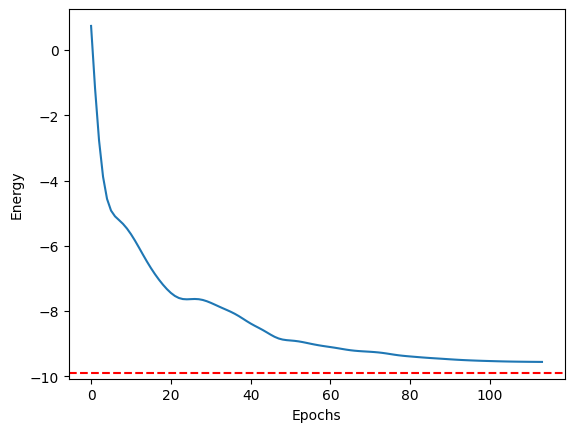

In [ ]:
L=5
hxxz= nk.hilbert.Spin(s=1/2, N=5)
study_ansatz_fixed_delta(hxxz,-1.5,nearest_neighbours_ansatz_Rii,4*L+1,1e-3,200)


Finally, we define another ansatz circuit based in Rii gates:

In [ ]:
def nearest_neighbours_ansatz_Rii_two_layers(theta,hxxz):
  '''
  This ansatz has the same number of quantum gates as the nearest_neighbours. However,
  it need only half the parameters.
  Parameters:
     theta:  is a vector of size hxxz.size
     hxxz: the Hilbert space (netket)

  returns psi_tmp, the wave function of the state after applying the circuit

  '''
  L=hxxz.size
  D= 2**L
  #psi_re = np.zeros(D)
  #psi_im = np.zeros(D)
  psi_re = pt.zeros(D,dtype=pt.float64)
  psi_im = pt.zeros(D,dtype=pt.float64)

  psi_re[D-1] = 1   # In computational basis this vector
                    # corresponds to all spins down

  #psi_tmp = psi_re+1j*psi_im
  #psi_tmp= sp.csr_matrix(psi_tmp.reshape(-1,1))  #Convert to sparse column vector
  psi_tmp=pt.complex(psi_re,psi_im)
  for j in range(2):
    for i in range(L):
        if i != L-1 :
          psi_tmp = Rzz(theta[i+j*(4*L+1)],i,i+1,hxxz)@psi_tmp
          psi_tmp = Rxx(theta[i+L-1+j*(4*L+1)],i,i+1,hxxz)@psi_tmp
        else:
          psi_tmp = Rzz(theta[i+j*(4*L-1)],0,L-1,hxxz)@psi_tmp
          psi_tmp = Rxx(theta[i+L-1+j*(4*L-1)],0,L-1,hxxz)@psi_tmp
        psi_tmp = Rz(theta[i+2*L-1+j*(4*L-1)],i,hxxz)@psi_tmp
        psi_tmp = Rx(theta[i+3*L-1+j*(4*L-1)],i,hxxz)@psi_tmp


  #for i in range(L):
      #if i != L-1 :
      #  psi_tmp = CNOT(i,i+1,hxxz)@psi_tmp

         ##We apply CNOT between nearest neighbours
      #  psi_tmp = CNOT(i,i+1,hxxz)@psi_tmp

  #for i in range(L):
  #    if i != L-1 :
  #      psi_tmp = Rzz(theta[i+2*L-2],i,i+1,hxxz)@psi_tmp


  return psi_tmp

Finally, we find our best ansatz.

The initial theta parameters:
tensor([ 0.7645,  0.8300, -0.2343,  0.9186, -0.2191,  0.2018, -0.4869,  0.5873,
         0.8815, -0.7336,  0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,
         0.7709,  0.1478, -0.4668,  0.2549, -0.4607, -0.1173, -0.4062,  0.6634,
        -0.7894, -0.4610, -0.2824, -0.6013,  0.0944, -0.9877,  0.9031, -0.8495,
         0.7720,  0.1664, -0.3247,  0.6179,  0.1559,  0.8080,  0.1093, -0.3154,
         0.2687, -0.2712], requires_grad=True)



Exact diagonalization provides E_GS = -9.90
VQE                   provides E_GS = -9.74
Number of iterations: 39
VQE time: 23.919162034988403 seconds
Exact diagonalization time: 0.025550127029418945 seconds
The final theta parameters:
tensor([ 1.7446,  2.1992, -0.6805,  2.5194, -0.1197, -0.5788, -0.9216,  0.1351,
         0.8553, -1.1619,  1.4939, -1.0191,  1.9634,  0.7933,  2.5446, -0.1052,
         0.0449,  0.9610, -0.0675,  0.2549, -0.4607,  0.1498, -0.8451,  0.1021,
         0.0410, -0.8526, -0.0181, -1.1355, -

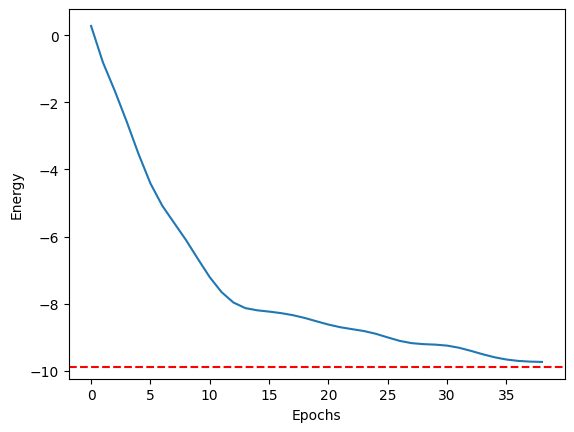

In [ ]:
hxxz= nk.hilbert.Spin(s=1/2, N=5)

study_ansatz_fixed_delta(hxxz,-1.5,nearest_neighbours_ansatz_Rii_two_layers,8*L+2,1e-2,200)


We define a function to obtain the ground state energy for all $\Delta$ for a given ansatz.

In [ ]:
def obtain_ground_state_and_energy_for_all_delta(L,ansatz_circuit,n_params,convergence,max_iter):

  pt.manual_seed(42)
  theta = pt.empty(n_params, requires_grad=True)

  # Then fill it with random values using uniform_()
  pt.nn.init.uniform_(theta, -1, 1)
  optimizer = pt.optim.Adam([theta],lr = 0.1)
  E_variational_vs_delta = []

  hxxz = nk.hilbert.Spin(s=1 / 2, N=L)
  prev_e=0.0+0j
  cur_e=1.0+0j

  iterations = 0
  states_vs_delta=[]
  for delta in np.linspace(-2,2,20):
      loss = get_E(theta,delta,hxxz,ansatz_circuit)[0]
      prev_e=0.0+0j
      cur_e=1.0+0j
      state=pt.zeros(2**L,dtype=pt.complex128)

      while np.abs(prev_e - cur_e) > convergence and iterations < max_iter:
        prev_e = loss.item()  # Store previous energy

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cur_e = get_E(theta, delta, hxxz, ansatz_circuit)[0].item().real  # Calculate current energy

        result= get_E(theta, delta, hxxz, ansatz_circuit) # Update loss for next iteration
        state=result[1]
        loss=result[0]
        iterations += 1
      ##When it converges, we add the energy to the list
      E_variational_vs_delta.append(cur_e)
      states_vs_delta.append(state)
      if iterations==max_iter:
        print(f"Warning!!!!! The number of iterations is not enough for {ansatz_circuit} with convergence: {convergence}")
  return [E_variational_vs_delta, states_vs_delta]


We obtain here all the energies obtained through the VQE with the different ansatzes for different values of $\delta$.

In [ ]:
L=5
#nearest_neighbours_ansatz_gs= obtain_ground_state_and_energy_for_all_delta(L, nearest_neighbours_ansatz,2*L,1e-3,250)
nearest_neighbours_ansatz_eff_gs= obtain_ground_state_and_energy_for_all_delta(L, nearest_neighbours_ansatz_eff,L,1e-3,300)
nearest_neighbours_ansatz_Rii_two_layer_gs= obtain_ground_state_and_energy_for_all_delta(L, nearest_neighbours_ansatz_Rii_two_layers,8*L+2,1e-3,300)
nearest_neighbours_ansatz_Rii_gs= obtain_ground_state_and_energy_for_all_delta(L, nearest_neighbours_ansatz_Rii,4*L+1,1e-3,250)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


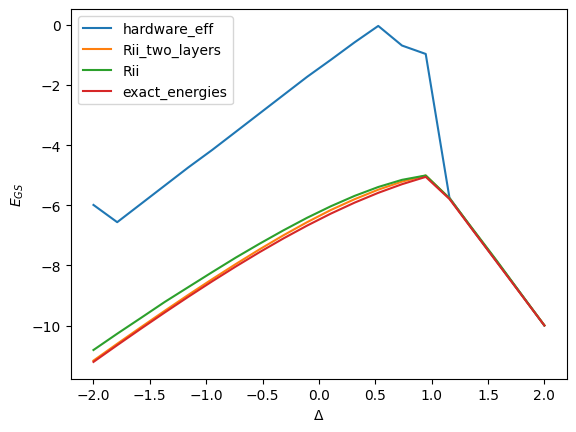

In [ ]:
L=5
deltas=[ delta for delta in np.linspace(-2,2,20)]
hxxz= nk.hilbert.Spin(s=1/2, N=5)

state_data= [compute_values_gs(hxxz, delta) for delta in deltas]
exact_diag_energies=  [ state_data[i][0] for i in range(len(state_data))]
#plt.plot(deltas,nearest_neighbours_ansatz_gs[0], label="nearest_neighbours_ansatz")
plt.plot(deltas,nearest_neighbours_ansatz_eff_gs[0], label="hardware_eff")
plt.plot(deltas,nearest_neighbours_ansatz_Rii_two_layer_gs[0], label="Rii_two_layers")
plt.plot(deltas,nearest_neighbours_ansatz_Rii_gs[0], label="Rii")
plt.plot(deltas,exact_diag_energies, label="exact_energies")

plt.xlabel(r"$\Delta$")
plt.ylabel(r"$E_{GS}$")
plt.savefig("En_vs_delta_VQE.png")

plt.legend()



It´s clear that the worst approximation is given by hardware_eff.

A part from the energy, we can get information about the total spin expectation values, taking into account the state to which the algorithm converges. This state is supposed to be the ground state, so we want to compare its expectation value for total spin with the expectation value obtained with exact diagonalization

In [ ]:
S_x1=[]
S_x2=[]
S_x3=[]


S_y1=[]
S_y2=[]
S_y3=[]


S_z1=[]
S_z2=[]
S_z3=[]


Sx,Sy,Sz= obtain_Si(hxxz)
##Since we checked that there is second order degeneraciy we get the first and second ground states of L=2
state_data_0= [ state_data[i][2][0] for i in range(len(state_data))]
state_data_1= [ state_data[i][2][1] for i in range(len(state_data))]
L=5

hxxz=nk.hilbert.Spin(s=1 / 2, N=L)

entropies_vqe1=[]
entropies_vqe2=[]
entropies_vqe3=[]

entropies_ED_0=[]
entropies_ED_1=[]
Sx_exp_vqe1=[]
Sy_exp_vqe1=[]
Sz_exp_vqe1=[]

VarSx_vqe1=[]
VarSy_vqe1=[]
VarSz_vqe1=[]

Sx_exp_vqe2=[]
Sy_exp_vqe2=[]
Sz_exp_vqe2=[]

VarSx_vqe2=[]
VarSy_vqe2=[]
VarSz_vqe2=[]

Sx_exp_vqe3=[]
Sy_exp_vqe3=[]
Sz_exp_vqe3=[]

VarSx_vqe3=[]
VarSy_vqe3=[]
VarSz_vqe3=[]

Sx_exp_ed0=[]
Sy_exp_ed0=[]
Sz_exp_ed0=[]

VarSx_ed0=[]
VarSy_ed0=[]
VarSz_ed0=[]

Sx_exp_ed1=[]
Sy_exp_ed1=[]
Sz_exp_ed1=[]

VarSx_ed1=[]
VarSy_ed1=[]
VarSz_ed1=[]




fidelities_vqe1_ed0=[]
fidelities_vqe1_ed1=[]
fidelities_vqe2_ed0=[]
fidelities_vqe2_ed1=[]

fidelities_vqe3_ed0=[]
fidelities_vqe3_ed1=[]

##For all delta...
for i in range(len(nearest_neighbours_ansatz_Rii_two_layer_gs[0])):
      state_vqe1=nearest_neighbours_ansatz_eff_gs[1][i].detach().numpy()
      state_vqe2=nearest_neighbours_ansatz_Rii_two_layer_gs[1][i].detach().numpy()
      state_vqe3=nearest_neighbours_ansatz_Rii_gs[1][i].detach().numpy()


###FIDELITY###
      fidelities_vqe1_ed0.append(np.abs(state_vqe1.dot(state_data_0[i]))**2)
      fidelities_vqe1_ed1.append(np.abs(state_vqe1.dot(state_data_1[i]))**2)

      fidelities_vqe2_ed0.append(np.abs(state_vqe2.dot(state_data_0[i]))**2)
      fidelities_vqe2_ed1.append(np.abs(state_vqe2.dot(state_data_1[i]))**2)

      fidelities_vqe3_ed0.append(np.abs(state_vqe3.dot(state_data_0[i]))**2)
      fidelities_vqe3_ed1.append(np.abs(state_vqe3.dot(state_data_1[i]))**2)


### FIDELITY###


##ENTROPIES =============================
      entropies_vqe1.append(get_entropy_bipartite(state_vqe1,L))
      entropies_vqe2.append(get_entropy_bipartite(state_vqe2,L))
      entropies_vqe3.append(get_entropy_bipartite(state_vqe3,L))

      ##We add entropy of the exacts first and second ground states
      entropies_ED_0.append(get_entropy_bipartite(state_data_0[i],L))
      entropies_ED_1.append(get_entropy_bipartite(state_data_1[i],L))
##ENTROPIES================================

##Spin data for vqe1 state

      spin_data= compute_Si(state_vqe1)
      Sx_exp_vqe1.append(spin_data[0][0])
      Sy_exp_vqe1.append(spin_data[0][1])
      Sz_exp_vqe1.append(spin_data[0][2])

      VarSx_vqe1.append(spin_data[1][0])
      VarSy_vqe1.append(spin_data[1][1])
      VarSz_vqe1.append(spin_data[1][2])

## Spin data for vqe2 state
      spin_data= compute_Si(state_vqe2)

      Sx_exp_vqe2.append(spin_data[0][0])
      Sy_exp_vqe2.append(spin_data[0][1])
      Sz_exp_vqe2.append(spin_data[0][2])

      VarSx_vqe2.append(spin_data[1][0])
      VarSy_vqe2.append(spin_data[1][1])
      VarSz_vqe2.append(spin_data[1][2])
##Spin data for vqe3 state
      spin_data= compute_Si(state_vqe3)

      Sx_exp_vqe3.append(spin_data[0][0])
      Sy_exp_vqe3.append(spin_data[0][1])
      Sz_exp_vqe3.append(spin_data[0][2])

      VarSx_vqe3.append(spin_data[1][0])
      VarSy_vqe3.append(spin_data[1][1])
      VarSz_vqe3.append(spin_data[1][2])

## Spin data for first ED state
      spin_data= compute_Si(state_data_0[i])

      Sx_exp_ed0.append(spin_data[0][0])
      Sy_exp_ed0.append(spin_data[0][1])
      Sz_exp_ed0.append(spin_data[0][2])

      VarSx_ed0.append(spin_data[1][0])
      VarSy_ed0.append(spin_data[1][1])
      VarSz_ed0.append(spin_data[1][2])

##Spin data for second ED state
      spin_data= compute_Si(state_data_1[i])

      Sx_exp_ed1.append(spin_data[0][0])
      Sy_exp_ed1.append(spin_data[0][1])
      Sz_exp_ed1.append(spin_data[0][2])

      VarSx_ed1.append(spin_data[1][0])
      VarSy_ed1.append(spin_data[1][1])
      VarSz_ed1.append(spin_data[1][2])




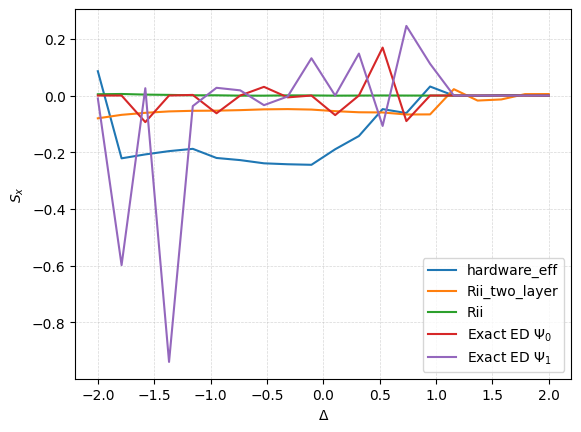

In [ ]:
deltas=[ delta for delta in np.linspace(-2,2,20)]
plt.plot(deltas,Sx_exp_vqe1, label="hardware_eff")
plt.plot(deltas,Sx_exp_vqe2, label="Rii_two_layer")
plt.plot(deltas,Sx_exp_vqe3, label="Rii")
plt.plot(deltas,Sx_exp_ed0, label=r"Exact ED $\Psi_0$")
plt.plot(deltas,Sx_exp_ed1, label=r"Exact ED $\Psi_1$")
plt.xlabel(r"$\Delta$")
plt.ylabel(r"$S_x$")
plt.legend()
plt.savefig("S_x_vs_delta_VQE.png")

plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()


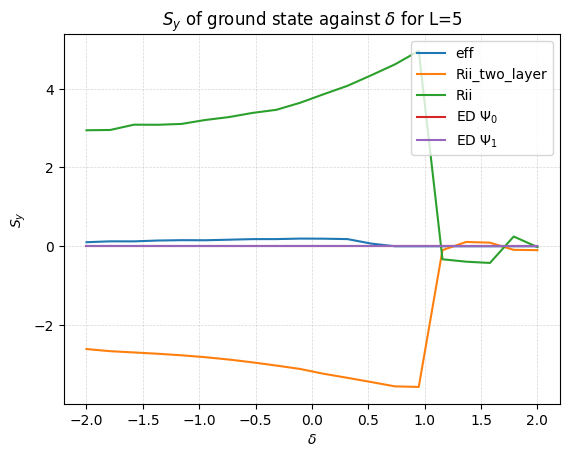

In [ ]:
deltas=[ delta for delta in np.linspace(-2,2,20)]
plt.plot(deltas,Sy_exp_vqe1, label="eff")
plt.plot(deltas,Sy_exp_vqe2, label="Rii_two_layer")
plt.plot(deltas,Sy_exp_vqe3, label="Rii")
plt.plot(deltas,Sy_exp_ed0, label=r"ED $\Psi_0$")
plt.plot(deltas,Sy_exp_ed1, label=r"ED $\Psi_1$")
plt.xlabel(r"$\delta$")
plt.ylabel(r"$S_y$")
plt.title(r"$S_y$ of ground state against $\delta$ for L=5")
plt.legend()
plt.savefig("S_y_vs_delta_VQE.png")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

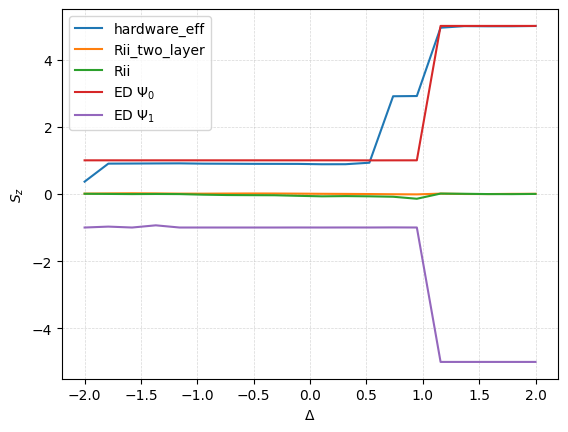

In [ ]:

deltas=[ delta for delta in np.linspace(-2,2,20)]

##To have a separated line for Sz for each ground state (avoid that ed0 and ed1 cross)
for i in range(len(Sz_exp_vqe1)):
  if i!=0:
    if Sz_exp_ed0[i]*Sz_exp_ed0[i-1]< 0:
      aux=Sz_exp_ed0[i]
      Sz_exp_ed0[i]=Sz_exp_ed1[i]
      Sz_exp_ed1[i]=aux



plt.plot(deltas,Sz_exp_vqe1, label="hardware_eff")
plt.plot(deltas,Sz_exp_vqe2, label="Rii_two_layer")
plt.plot(deltas,Sz_exp_vqe3, label="Rii")
plt.plot(deltas,Sz_exp_ed0, label=r"ED $\Psi_0$")
plt.plot(deltas,Sz_exp_ed1, label=r"ED $\Psi_1$")
plt.xlabel(r"$\Delta$")
plt.ylabel(r"$S_z$")
plt.savefig("S_z_vs_delta_VQE.png")

plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

Now, we compute the entropies for the states obtained \in each $\delta$ for $L=5$.

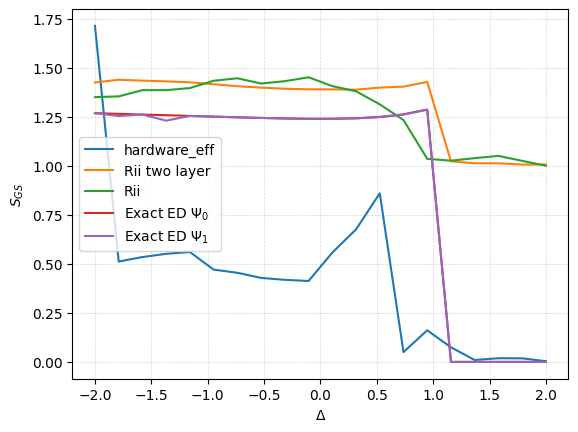

In [ ]:
plt.plot(deltas,entropies_vqe1, label="hardware_eff")
plt.plot(deltas,entropies_vqe2, label="Rii two layer")
plt.plot(deltas,entropies_vqe3, label="Rii")
plt.plot(deltas,entropies_ED_0, label=r"Exact ED $\Psi_0$")
plt.plot(deltas,entropies_ED_1, label=r"Exact ED $\Psi_1$")

plt.xlabel(r"$\Delta$")
plt.ylabel("$S_{GS}$")
plt.savefig("Entropy_vs_delta_VQE.png")

plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

Both ground states obtain by ED have the same entropy.

Now we will compute the fidelity, in order to know how well the obtained states approximate the ground state.

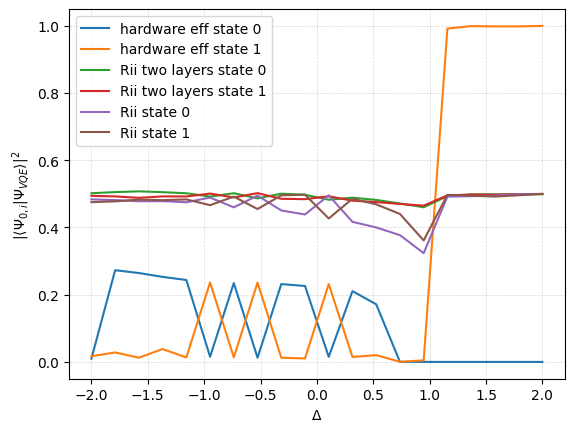

In [ ]:
deltas=[ delta for delta in np.linspace(-2,2,20)]

plt.plot(deltas,fidelities_vqe1_ed0, label=r"hardware eff state 0")
plt.plot(deltas,fidelities_vqe1_ed1, label=r"hardware eff state 1")

plt.plot(deltas,fidelities_vqe2_ed0, label=r"Rii two layers state 0")
plt.plot(deltas,fidelities_vqe2_ed1, label=r"Rii two layers state 1")

plt.plot(deltas,fidelities_vqe3_ed0, label=r"Rii state 0")
plt.plot(deltas,fidelities_vqe3_ed1, label=r"Rii state 1")

plt.xlabel(r"$\Delta$")
plt.ylabel(r'$|\langle \Psi_{0,i} | \Psi_{VQE} \rangle|^2$')
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

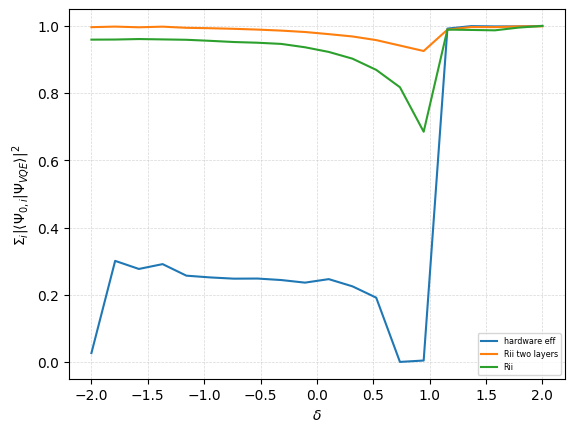

In [ ]:
deltas=[ delta for delta in np.linspace(-2,2,20)]

plt.plot(deltas, np.array(fidelities_vqe1_ed0)+np.array( fidelities_vqe1_ed1), label=r"hardware eff")

plt.plot(deltas,np.array(fidelities_vqe2_ed0)+np.array( fidelities_vqe2_ed1), label=r"Rii two layers")
plt.plot(deltas,np.array(fidelities_vqe3_ed0)+np.array( fidelities_vqe3_ed1), label=r"Rii")


plt.xlabel(r"$\delta$")
plt.ylabel(r'$\Sigma_i |\langle \Psi_{0,i} | \Psi_{VQE} \rangle|^2$')
plt.legend(fontsize='xx-small')
plt.savefig("Fidelity_vs_delta_VQE.png")

plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()

When summing the fidelities over the two degenerate ground states, we obtain almost 1 for all $\delta$ in the case of Rii with two layers, with an exception in $\delta=1$, when the state of $S_z$  changes.

Now, we will calculate the evolution of the state $|+\rangle^{\otimes r}$ for each time step.

In [ ]:
hxxz= nk.hilbert.Spin(s=1/2, N=2)
had_single = pt.tensor([[1, 1], [1, -1]], dtype=pt.complex128) / np.sqrt(2)
H=pt.tensor(create_hamiltonian(delta,hxxz).to_dense(), dtype=pt.complex128)

def create_hadamard(L):
  result=had_single
  if L==1:
    return result
  else:
    for i in range(L-1):
     result= pt.kron(had_single,result)
  return result
had2=create_hadamard(2)
print(had2)




def evolveState(t,delta,hxxz, had):
  state=pt.zeros(2**hxxz.size, dtype=pt.complex128)
  #This is de |0\rangle state for all qubits
  state[0]=1+0j
  #had@state represents |+ \rangle for all qubits
  evolution_operator=expm(-1j*t*H)
  return evolution_operator@had@state




tensor([[ 0.5000+0.j,  0.5000+0.j,  0.5000+0.j,  0.5000+0.j],
        [ 0.5000+0.j, -0.5000+0.j,  0.5000+0.j, -0.5000+0.j],
        [ 0.5000+0.j,  0.5000+0.j, -0.5000+0.j, -0.5000+0.j],
        [ 0.5000+0.j, -0.5000+0.j, -0.5000+0.j,  0.5000-0.j]],
       dtype=torch.complex128)


The result below gives $2^{-5/2}$ in all the components of the state vector in the computational basis, as it´s the state at t=0

In [ ]:
hxxz= nk.hilbert.Spin(s=1/2, N=5)
H=pt.tensor(create_hamiltonian(delta,hxxz).to_dense(), dtype=pt.complex128)
had=create_hadamard(5)
evolveState(0,1.5,hxxz,had)


tensor([0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j,
        0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j,
        0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j,
        0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j,
        0.1768+0.j, 0.1768+0.j, 0.1768+0.j, 0.1768+0.j],
       dtype=torch.complex128)

Since we want our fidelity to be maximum, we want to minimize 1-fidelity, so that it reaches 0 at its minimum.

In [ ]:
def get_Fidelity_loss(theta,evolvedState,delta,hxxz,ansatz_circuit):
  '''
  Calculates the fidelity of the ansatz with the exact evolved state. The ansatz is calculated
  with the parameters theta following the procedure defined through the ansatz circuit.
  Parameters:
     theta: Optimization parameters
     delta: anisotropy parameter
     ansatz_circuit: Function that calculates the ansatz state
  '''
  psi_tmp = ansatz_circuit(theta, hxxz)
  fid_ampl=psi_tmp.conj().T @evolvedState
  return [pt.real(1-fid_ampl*fid_ampl.conj()), psi_tmp]

In [ ]:


def obtain_evolved_state_through_fidelity_opt(L,delta,ansatz_circuit,n_params,convergence,max_iter,random):


  pt.manual_seed(42)
  theta = pt.empty(n_params, requires_grad=True)

    # Then fill it with random values using uniform_()
  pt.nn.init.uniform_(theta, -1, 1)

  optimizer = pt.optim.Adam([theta],lr = 1.0)

  hxxz = nk.hilbert.Spin(s=1 / 2, N=L)


  iterations = 0
  Fid_variational_vs_t=[]
  states_vs_t=[]

  for i in tqdm(range(11),desc="Time evolution"):
    t= 0+ 4*np.pi/20*i
    if random:
        pt.nn.init.uniform_(theta, -1, 1)
    evolvedState=evolveState(t,delta,hxxz, had)
    loss=get_Fidelity_loss(theta,evolvedState,delta,hxxz,ansatz_circuit)[0]
    prev_loss=0.0
    cur_loss=1.0
    while np.abs(prev_loss - cur_loss) > convergence and iterations < max_iter:
      cur_loss = loss.item()  # Store previous fidelity

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      #print(loss.item().real)
      prev_loss=cur_loss


      result = get_Fidelity_loss(theta,evolvedState,delta,hxxz,ansatz_circuit)  # Update loss for next iteration

      loss=result[0]
      state=result[1]
      cur_loss= loss.item()
      iterations += 1
    ##When it converges, we add the fidelity to the list
    Fid_variational_vs_t.append(1-loss.item().real)
    states_vs_t.append(state)
    if iterations==max_iter:
        print(f"Warning!!!!! The number of iterations is not enough for {ansatz_circuit} with convergence: {convergence}")
  return [Fid_variational_vs_t,states_vs_t ]


In [ ]:
L=5
hxxz= nk.hilbert.Spin(s=1/2, N=L)
evolution_data_vqe1=obtain_evolved_state_through_fidelity_opt(L,1.5,nearest_neighbours_ansatz_eff,L,1e-3,300,False)
evolution_data_vqe2=obtain_evolved_state_through_fidelity_opt(L,1.5,nearest_neighbours_ansatz_Rii_two_layers,8*L+2,1e-3,300,False)
evolution_data_vqe3=obtain_evolved_state_through_fidelity_opt(L,1.5,nearest_neighbours_ansatz_Rii,4*L+1,1e-3,300,False)



Time evolution: 100%|██████████| 11/11 [00:31<00:00,  2.82s/it]


In [ ]:
times=[ t for t in np.linspace(0,4*np.pi,11)]
plt.plot(times,evolution_data_vqe1[0], label="eff")
plt.plot(times,evolution_data_vqe2[0], label="Rii two layer")
plt.plot(times,evolution_data_vqe3[0], label="Rii")
plt.xlabel(r"$t$")
plt.ylabel(r"$|\langle \Psi(t)_{} | \Psi_{VQE}|^2$")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.savefig("fidelity_optimization_non_random.png")
plt.show()


NameError: name 'np' is not defined

In [ ]:
L=5
hxxz= nk.hilbert.Spin(s=1/2, N=L)
evolution_data_vqe1=obtain_evolved_state_through_fidelity_opt(L,1.5,nearest_neighbours_ansatz_eff,L,1e-4,300,True)
evolution_data_vqe2=obtain_evolved_state_through_fidelity_opt(L,1.5,nearest_neighbours_ansatz_Rii_two_layers,8*L+2,1e-3,300,True)
evolution_data_vqe3=obtain_evolved_state_through_fidelity_opt(L,1.5,nearest_neighbours_ansatz_Rii,4*L+1,1e-3,300,True)

Time evolution: 100%|██████████| 11/11 [00:23<00:00,  2.13s/it]


Warning!!!!! The number of iterations is not enough for <function nearest_neighbours_ansatz_eff at 0x78e2bc68d580> with convergence: 0.0001
Warning!!!!! The number of iterations is not enough for <function nearest_neighbours_ansatz_eff at 0x78e2bc68d580> with convergence: 0.0001


Time evolution: 100%|██████████| 11/11 [01:12<00:00,  6.57s/it]


Warning!!!!! The number of iterations is not enough for <function nearest_neighbours_ansatz_Rii_two_layers at 0x78e2b2abf7e0> with convergence: 0.001


Time evolution: 100%|██████████| 11/11 [00:35<00:00,  3.22s/it]


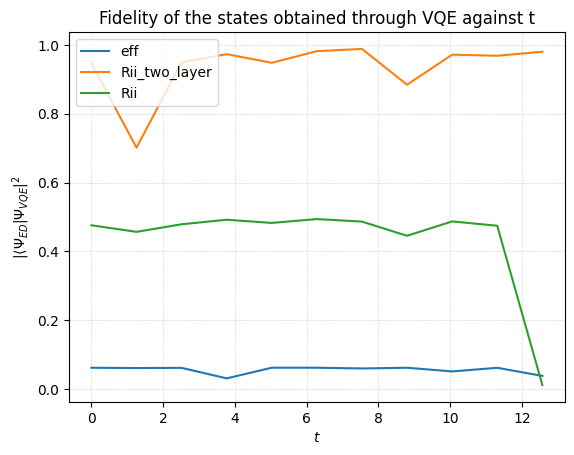

In [ ]:
times=[ t for t in np.linspace(0,4*np.pi,11)]
plt.plot(times,evolution_data_vqe1[0], label="eff")
plt.plot(times,evolution_data_vqe2[0], label="Rii_two_layer")
plt.plot(times,evolution_data_vqe3[0], label="Rii")
plt.xlabel(r"$t$")
plt.ylabel(r"$|\langle \Psi_{ED} | \Psi_{VQE}|^2$")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.savefig("fidelity_optimization_random.png")
plt.show()